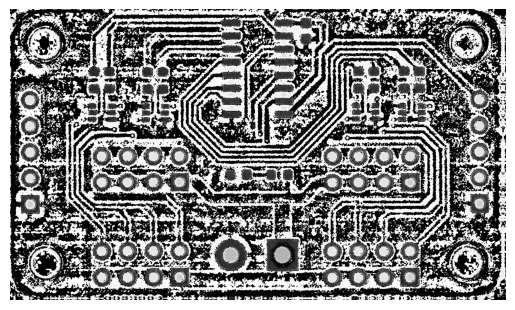

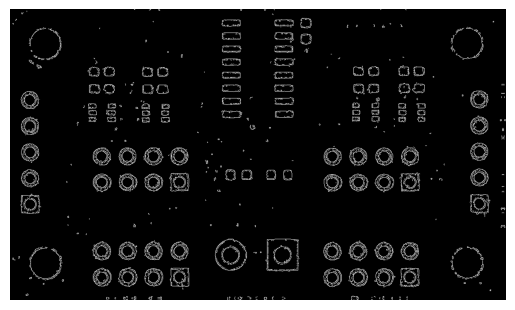

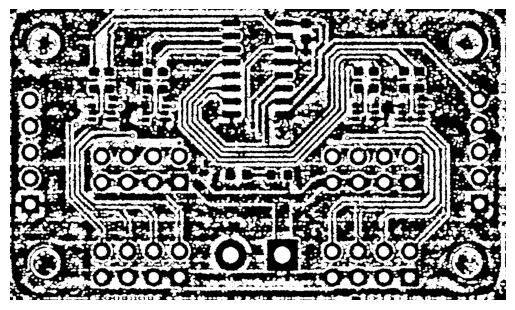

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
 

# seamless cloning


#path = 'dcc_encoder_top_black_back_2lam_1200dpi.png'
path = 'inpainted.png'

img = cv.imread(path, cv.IMREAD_GRAYSCALE)
lighting_est = cv.medianBlur(img, 51)
plt.imshow(lighting_est, 'grey')
plt.axis('off')
plt.show()
#Z = filter_img.reshape((-1,3))
filter_img =  img - lighting_est
plt.imshow(filter_img, 'grey')
plt.axis('off')
plt.show()

#thresh = cv.adaptiveThreshold(filter_img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
#cv.imwrite('thresh.png', thresh)
#plt.imshow(thresh, 'grey')
#plt.axis('off')
#plt.show()
edges = cv.Canny(img, 100 , 150)
plt.imshow(edges, 'grey')
plt.axis('off')
plt.show()

_, mask = cv.threshold(filter_img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
mask = cv.erode(mask, kernel, iterations=1)
#mask = cv.dilate(mask, kernel, iterations=1)
mask = cv.dilate(mask,cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5)))
cv.imwrite('mask.png', mask)

plt.imshow(mask, 'grey')
plt.axis('off')
plt.show()

img = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
filter_img = cv.medianBlur(img, 1)
inpainted_image = cv.inpaint(filter_img, mask, inpaintRadius=7, flags=cv.INPAINT_TELEA)
#inpainted_image = cv.inpaint(inpainted_image, mask, inpaintRadius=5, flags=cv.INPAINT_NS)
#inpainted_image = cv.inpaint(inpainted_image, mask, inpaintRadius=7, flags=cv.INPAINT_NS)
#inpainted_image = cv.inpaint(inpainted_image, mask, inpaintRadius=3, flags=cv.INPAINT_NS)

plt.imshow(inpainted_image)
plt.axis('off')
plt.show()

gray =  cv.cvtColor(inpainted_image, cv.COLOR_RGB2GRAY)
plt.imshow(gray, 'grey')
plt.axis('off')
plt.show()

_, mask = cv.threshold(gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
mask = cv.erode(mask,cv.getStructuringElement(cv.MORPH_ELLIPSE, (7, 7)))
plt.imshow(mask, 'grey')
plt.axis('off')
plt.show()

gray = gray - mask

_, edges = cv.threshold(gray, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
#edges = cv.Canny(gray, 100 , 150)
plt.imshow(edges, 'grey')
plt.axis('off')
plt.show()

"""# convert to np.float32
Z = np.float32(Z)
 
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 16
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
 
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((filter_img.shape))
plt.imshow(cv.cvtColor(res2, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()"""

